In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('device_failure.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
len(df['device'])

124494

In [5]:
# Most rows duplicate devices
df['device'].duplicated().sum()

123325

In [6]:
# How many unique devices are there?
df['device'].nunique()

1169

In [7]:
# There is only one instance where the same device has two measurements on the same day.
df[['device', 'date']].duplicated().sum()

1

In [8]:
# what is that row?
df[df[['device', 'date']].duplicated()==True]

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
101335,2015-07-10,S1F0R4Q8,0,192721392,0,0,0,8,213700,0,0,0


In [9]:
# we should remove one of these duplicate rows.
df.loc[(df['device']=='S1F0R4Q8') & (df['date']=='2015-07-10')]

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
101334,2015-07-10,S1F0R4Q8,0,192721392,0,0,0,8,213700,0,0,0
101335,2015-07-10,S1F0R4Q8,0,192721392,0,0,0,8,213700,0,0,0


In [10]:
# There is no missing data anywhere.
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [11]:
# Are attributes 7 and 8 identical? Yes they are.
False in list(df['attribute7']==df['attribute8'])

False

In [12]:
# All devices start on the same day: January 1st, 2015
df['date'].describe()

count         124494
unique           304
top       2015-01-01
freq            1163
Name: date, dtype: object

In [13]:
# Example of a device
'S1F11MB0' in list(df['device'].value_counts().index)

True

In [14]:
df.loc[df['device']=='S1F11MB0']

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
443,2015-01-01,S1F11MB0,0,173113976,0,0,0,5,198441,0,0,0
1606,2015-01-02,S1F11MB0,0,120647592,0,0,0,5,198441,0,0,0
2769,2015-01-03,S1F11MB0,0,100757160,0,0,0,5,198441,0,0,0
3932,2015-01-04,S1F11MB0,0,192750960,0,0,0,5,198441,0,0,0
5093,2015-01-05,S1F11MB0,0,211589728,0,0,0,5,198441,0,0,0
6213,2015-01-06,S1F11MB0,0,159348880,0,0,0,5,199492,0,0,0
23140,2015-01-29,S1F11MB0,1,92061968,0,0,0,11,211476,0,0,0


## Rare Variance

In [15]:
dfsd=df.groupby('device').std()
dfsd=dfsd[['attribute1', 'attribute2', 'attribute3', 'attribute4',
       'attribute5', 'attribute6', 'attribute7', 'attribute9']]

In [16]:
dfdevice=df.groupby('device').mean()
dfdevice=dfdevice['failure']

In [17]:
dfsmall=pd.concat([dfdevice, dfsd], axis=1)
dfsmall['failed01']=0
dfsmall.loc[dfsmall['failure']>0, 'failed01']=1
dfsmall.head()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,failed01
device,,,,,,,,,,
S1F01085,0.0,6.888088e+07,0.0,0.0,0.0,0.0,794.719007,0.0,0.0,0
S1F013BB,0.0,9.157123e+07,0.0,0.0,0.0,0.0,82.762310,0.0,0.0,0
S1F0166B,0.0,8.300793e+07,0.0,0.0,0.0,0.0,657.432709,0.0,0.0,0
S1F01E6Y,0.0,6.818503e+07,0.0,0.0,0.0,0.0,6645.807521,0.0,0.0,0
S1F01JE0,0.0,6.441321e+07,0.0,0.0,0.0,0.0,795.835766,0.0,0.0,0


In [18]:
for col in ['attribute1', 'attribute2', 'attribute3', 'attribute4',
       'attribute5', 'attribute6', 'attribute7', 'attribute9']:
    dfsmall['novar_'+col]=0
    dfsmall.loc[dfsmall[col]==0, 'novar_'+col]=1

In [19]:
for col in ['attribute1', 'attribute2', 'attribute3', 'attribute4',
       'attribute5', 'attribute6', 'attribute7', 'attribute9']:
    print(col, '\n', dfsmall['novar_'+col].value_counts(), '\n')

attribute1 
 0    1169
Name: novar_attribute1, dtype: int64 

attribute2 
 1    1065
0     104
Name: novar_attribute2, dtype: int64 

attribute3 
 1    1158
0      11
Name: novar_attribute3, dtype: int64 

attribute4 
 1    1081
0      88
Name: novar_attribute4, dtype: int64 

attribute5 
 1    848
0    321
Name: novar_attribute5, dtype: int64 

attribute6 
 0    1115
1      54
Name: novar_attribute6, dtype: int64 

attribute7 
 1    1108
0      61
Name: novar_attribute7, dtype: int64 

attribute9 
 1    1123
0      46
Name: novar_attribute9, dtype: int64 



In [21]:
import seaborn as sns
corrs = dfsmall[['novar_attribute2', 'novar_attribute3', 'novar_attribute4',
       'novar_attribute5', 'novar_attribute6', 'novar_attribute7', 'novar_attribute9', 'failed01']].corr()
sns.heatmap(corrs);

In [22]:
corrs

,novar_attribute2,novar_attribute3,novar_attribute4,novar_attribute5,novar_attribute6,novar_attribute7,novar_attribute9,failed01
novar_attribute2,1.000000,0.062910,0.377771,0.016442,-0.045749,0.304986,0.044936,-0.361742
novar_attribute3,0.062910,1.000000,0.072939,0.098855,-0.020763,0.096654,0.299276,-0.000079
novar_attribute4,0.377771,0.072939,1.000000,0.136834,-0.014442,0.516211,0.042311,-0.508337
novar_attribute5,0.016442,0.098855,0.136834,1.000000,0.135399,0.122811,0.141649,-0.119434
novar_attribute6,-0.045749,-0.020763,-0.014442,0.135399,1.000000,-0.003339,-0.018343,-0.012724
novar_attribute7,0.304986,0.096654,0.516211,0.122811,-0.003339,1.000000,0.071215,-0.448332
novar_attribute9,0.044936,0.299276,0.042311,0.141649,-0.018343,0.071215,1.000000,-0.058668
failed01,-0.361742,-0.000079,-0.508337,-0.119434,-0.012724,-0.448332,-0.058668,1.000000


In [23]:
print(len(df['attribute1']))
print(df['attribute1'].nunique())

124494
123877


In [24]:
dfsmall['failed01'].value_counts()

0    1063
1     106
Name: failed01, dtype: int64

In [25]:
pd.crosstab(dfsmall['failed01'], dfsmall['novar_attribute4'], normalize='columns')

novar_attribute4,0,1
failed01,,
0,0.397727,0.950971
1,0.602273,0.049029


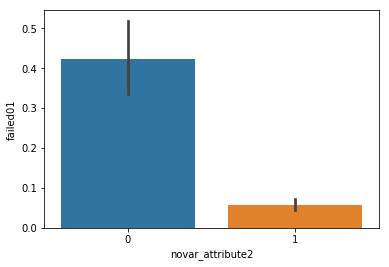

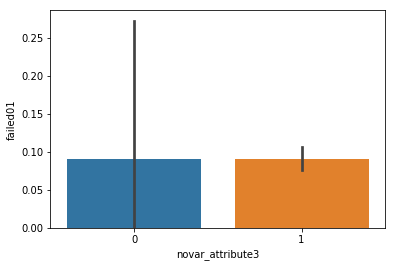

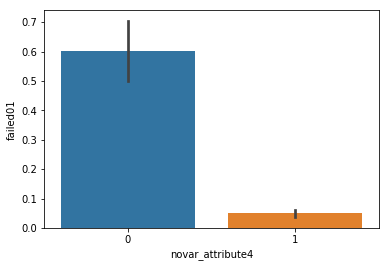

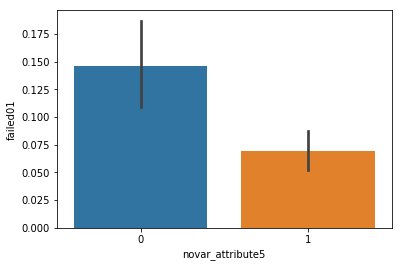

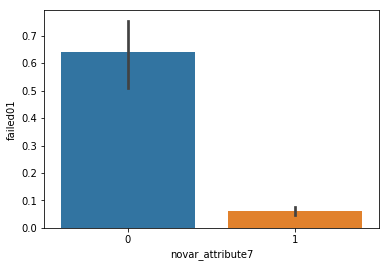

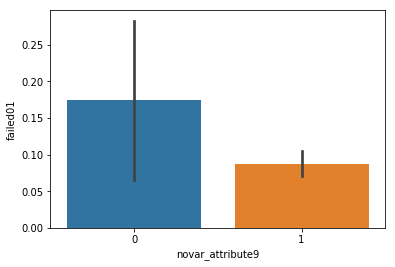

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in [2,3,4,5,7,9]:
    sns.barplot(x='novar_attribute'+str(i), y='failed01', data=dfsmall);
    plt.show()


## What about attribute 1?

let's look at one device

In [27]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [34]:
# Which device has the most number of records?
dflong=df.groupby('device').count().reset_index(drop=False)

In [35]:
dflong[dflong['date']==dflong['date'].max()].head()

,device,date,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
79,S1F0E9EP,304,304,304,304,304,304,304,304,304,304,304
81,S1F0EGMT,304,304,304,304,304,304,304,304,304,304,304
85,S1F0FGBQ,304,304,304,304,304,304,304,304,304,304,304
86,S1F0FP0C,304,304,304,304,304,304,304,304,304,304,304
92,S1F0GCED,304,304,304,304,304,304,304,304,304,304,304


In [62]:
att1=df[df['device']=='S1F0E9EP'][['date', 'device', 'failure', 'attribute1']]
att1.head()

,date,device,failure,attribute1
75,2015-01-01,S1F0E9EP,0,106791400
1238,2015-01-02,S1F0E9EP,0,126870472
2401,2015-01-03,S1F0E9EP,0,147004000
3564,2015-01-04,S1F0E9EP,0,169708424
4725,2015-01-05,S1F0E9EP,0,191451728


In [63]:
att1.date.dtype

dtype('O')

In [64]:
att1['newdate']=pd.to_datetime(att1['date'],infer_datetime_format=True)

In [68]:
att01=df[(df['device']=='S1F0E9EP') & (df['date']<'2015-03-30')][['date', 'device', 'failure', 'attribute1']]

In [66]:
att1.shape

(304, 5)

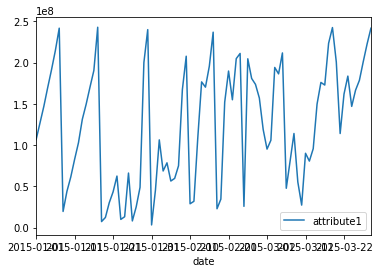

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

att01.plot(kind='line',x='date',y='attribute1',ax=ax)

plt.show()